<a href="https://colab.research.google.com/github/ashfaquesayyed/telecom-churn-analysis/blob/main/telecom_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
#Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

#Telecom Churn Analysis
**Submission by**
Ashfaque Sayyed (Cohort - Geneva)

##What is Customer Churn ?

##Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers. Telephone service companies, Internet service providers, pay TV companies, insurance firms, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients

In [55]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#providing data file directory and loading the file as a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn analysis/Telecom Churn.csv')

##Data Set Information

In order to understand our data, we can look at each columns and try to understand their meaning and relevance to this problem.

State: 51 states of USA(Categorical)

Account Length: Length of Account(Numerical)

Area Code: 3 area codes of 408, 415 and 510(Numerical)

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan(Categorical)

Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan(Categorical)

Number vmail messages: Number of Voice Mail Messages(Numerical)

Total day minutes: Total Number of Minutes Spent By Customers in Morning(Numerical)

Total day calls: Total Number of Calls made by Customer in Morning.(Numerical)

Total day charge: Total Charge to the Customers in Morning.(Numerical)

Total eve minutes:Total Number of Minutes Spent By Customers in Evening(Numerical)

Total eve calls: Total Number of Calls made by Customer in Evening.(Numerical)

Total eve charge: Total Charge to the Customers in Morning.(Numerical)

Total night minutes: Total Number of Minutes Spent By Customers in the Night.(Numerical)

Total night calls: Total Number of Calls made by Customer in Night.(Numerical)

Total night charge: Total Charge to the Customers in Night.(Numerical)

Total International minutes: Total Number of Minutes Spent by Customers for International calls.(Numerical)

Total International calls: Total Number of Internatinal Call made by Customer.(Numerical)

Total International charge: Total Charge to the Customer for International Calls.(Numerical)

Customer Service Calls: Calls by Customer to Customer Services for Solution of Problem faced in Network.(Numerical)

Churn: Customers who left the network Operator are given with TRUE and FALSE.(Categorical)

In [58]:
#data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
#Checking all the unique values
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [60]:
#duplicate values
df[df.duplicated()].count()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [61]:
df.info()
# There is no null values in this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [62]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [63]:
#All the columns in data
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#**Exploratory Data Analysis**

# **1.What is the Total churn rate ?**

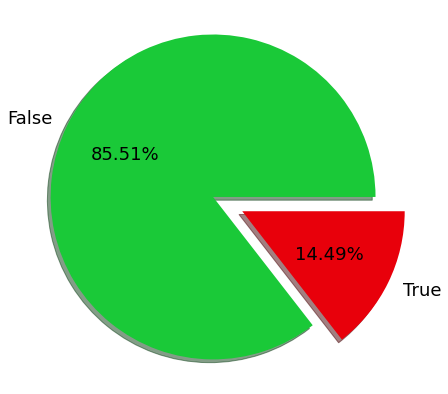

In [64]:
#Plot number of customers subscribed and unsubscribed in percentage
labels = ['False', 'True']
#values
values = df["Churn"].value_counts().values.tolist()
#colors
colors= sns.color_palette('bright')[2:5]
#figure size
fig = plt.figure(figsize =(7, 7))
#pie chart for values and labels with there percentage count
plt.pie(values, labels = labels, colors=colors, autopct='%0.2f%%', explode=[0.2,0],shadow=True, textprops={'fontsize': 18})
plt.axis("equal")
plt.show()

* In above pie chart, False are the people who are not leaving the services and True are those who left the service.
* Lets find out 14.49% people why they left the Telecommunication Company.

#**2. Which states have high churn rate ?**

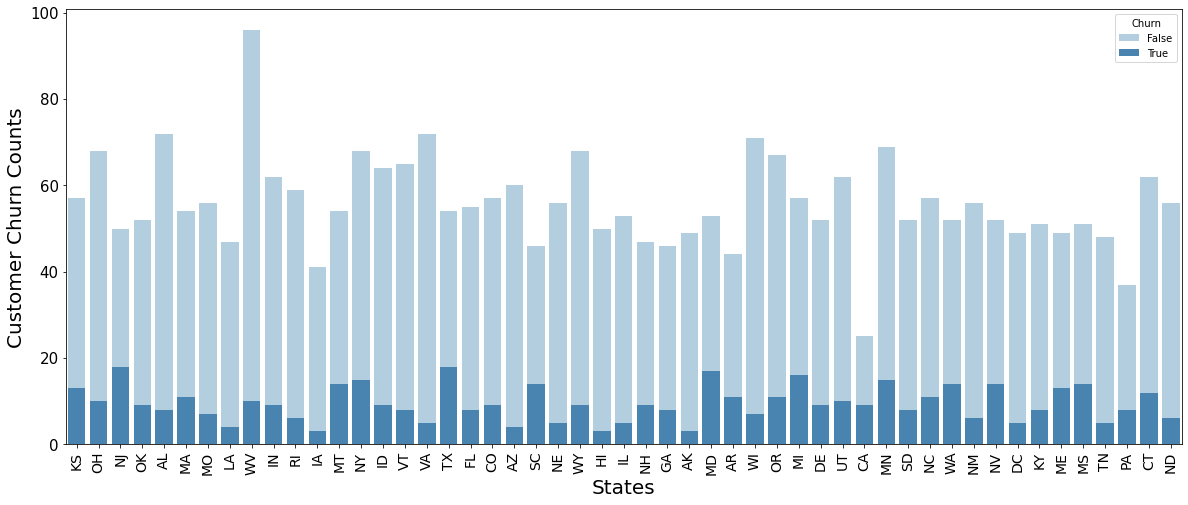

In [65]:
#figure size
plt.figure(figsize=(20,8))
#count plot
state_count = sns.countplot(x='State', hue='Churn', data=df, dodge=False, palette='Blues')
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
state_count.set_xlabel('States',fontsize=20)
state_count.set_ylabel('Customer Churn Counts',fontsize=20)
#show graph
plt.show()


* In above graph we can see that New Jersey(NJ), Texas(TX), Maryland (MD) and Michigan (MI), Minnesota (MN) have High churn rate.
* The state with low churn rate are Louisiana (LA), Iowa (IA), Arizona (AZ), Hawaii (HI), Alaska (AK).




# **3. How many customers prefering the Service plans and can Service plans affect the Churn?**

##People with International Plan

In [66]:
intl=df.groupby(['International plan', 'Churn']).agg({'Churn':'count'})
intl

Churn
International plan Churn       
No                 False   2664
                   True     346
Yes                False    186
                   True     137

Text(0, 0.5, 'Customer Churn Counts')

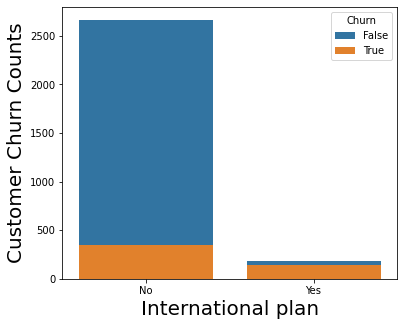

In [67]:
#figure size
plt.figure(figsize=(6,5))
#Making Count plot 
intl_plan=sns.countplot(data=df, x='International plan', hue='Churn', dodge= False)
#labeling
intl_plan.set_xlabel('International plan',fontsize=20)
intl_plan.set_ylabel('Customer Churn Counts',fontsize=20)

As we can conclude from the above bar graph, people with no International plan seems to have higher churn rate as compare to people with International plan.

##Customer with Voice Mail Plan

In [68]:
voice_mail_plan=df.groupby(['Voice mail plan', 'Churn']).agg({'Churn':'count'})
voice_mail_plan

Churn
Voice mail plan Churn       
No              False   2008
                True     403
Yes             False    842
                True      80

Text(0, 0.5, 'Customer Churn Counts')

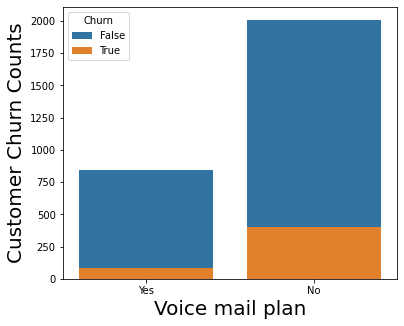

In [69]:
#figure size
plt.figure(figsize=(6,5))
#Making count plot
voice_plan=sns.countplot(data=df, x='Voice mail plan', hue='Churn', dodge= False)
#labeling
voice_plan.set_xlabel('Voice mail plan',fontsize=20)
voice_plan.set_ylabel('Customer Churn Counts',fontsize=20)

* This is also similar with International plan bar graph, people with no Voice mail plan seems to have higher churn rate as compare to people with Voice mail plan.
* Most of the customers don't have International plan and Voice mail plan so there is no effect of service of plans towards churn rate.

#**4. What are the charges distribution across different States?**

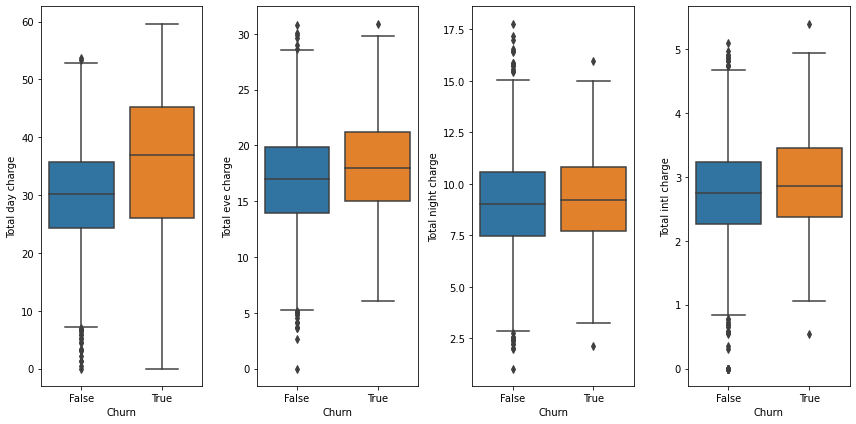

In [70]:
# subplots and figure size
fig, axs = plt.subplots(ncols=4,figsize=(12,6))
#graph plot
sns.boxplot(x='Churn', y='Total day charge', data=df, ax=axs[0])
sns.boxplot(x='Churn', y='Total eve charge', data=df, ax=axs[1])
sns.boxplot(x='Churn', y='Total night charge', data=df, ax=axs[2])
sns.boxplot(x='Churn', y='Total intl charge', data=df, ax=axs[3])

# this prevents plots from overlapping
plt.tight_layout()

* From the above box plot we conclude that the churn is directly proportional to charges
* Churn is high for day, night and evening minutes and comparatively low for international charges.

##Types of Charges divided in each states

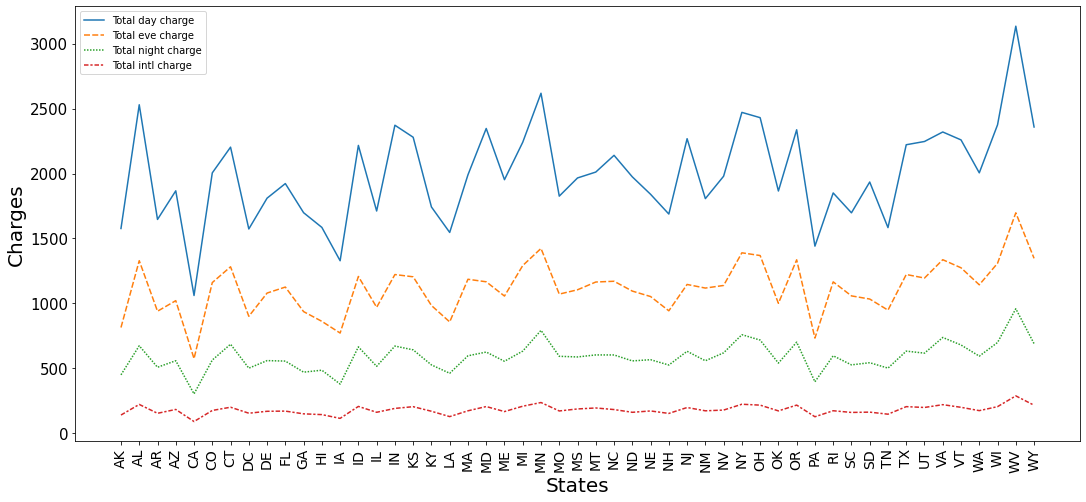

In [71]:
#data grouping
total_charges =df.groupby(['State']).agg({'Total day charge':'sum','Total eve charge':'sum','Total night charge':'sum','Total intl charge':'sum'})
#figure size
plt.figure(figsize=(18,8))
#Graph plot
d = sns.lineplot(data=total_charges)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
d.set_xlabel('States',fontsize=20)
d.set_ylabel('Charges',fontsize=20)
#show graph
plt.show()


* As we can see in above graph, day charges are comparitively higher than evening charges and night charges. The total international charges are minimum. The churn rate is not affected by the total international charge. 

##Total Charges in each state

In [72]:
#adding all charges
df['Total charges']= df['Total day charge']+ df['Total eve charge']+ df['Total intl charge']+ df['Total night charge']

#adding all charges


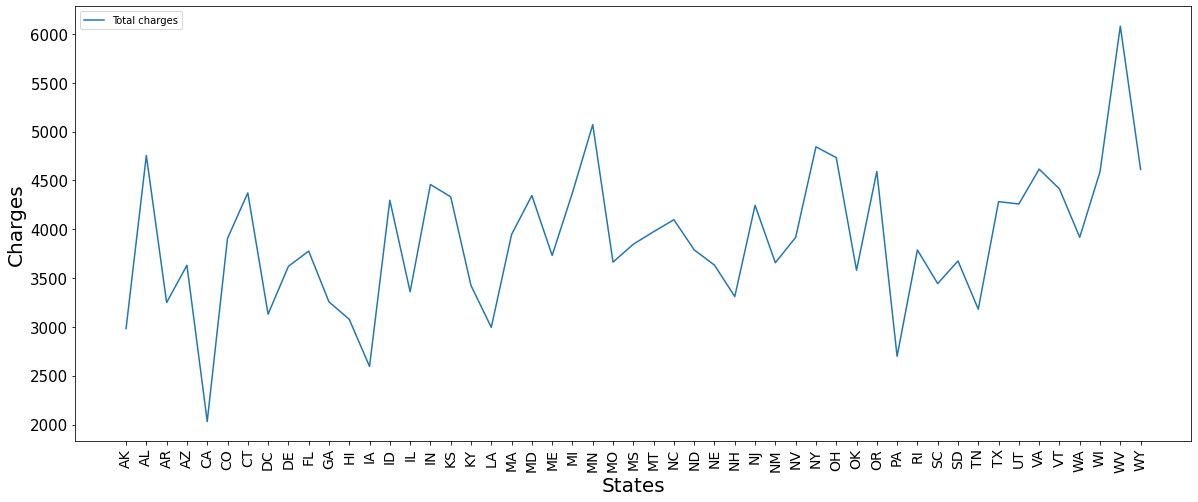

In [73]:
#data grouping
total_c= df.groupby(['State']).agg({ 'Total charges': 'sum'})
#figure size
plt.figure(figsize=(20,8))
#graph plot
a=sns.lineplot(data= total_c)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
a.set_xlabel('States',fontsize=20)
a.set_ylabel('Charges',fontsize=20)
#show graph
plt.show()
#total_c

* Total charges in state of West Virginia(WV), Michigan(MI) and Alabama(AL) are maximum where as the churn rate is high in state of Michigan(MI).
* Churn rate is low in state of Alabama(AL).
* Charges is not affecting churn rate.

#**5. How much minute spend in calls ?**

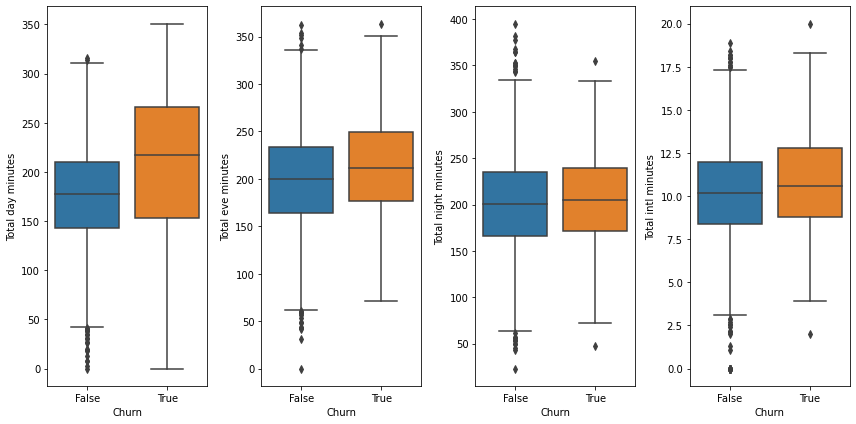

In [74]:
# subplots and figure size
fig, axs = plt.subplots(ncols=4,figsize=(12,6))
#graph plot
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axs[0])
sns.boxplot(x='Churn', y='Total eve minutes', data=df, ax=axs[1])
sns.boxplot(x='Churn', y='Total night minutes', data=df, ax=axs[2])
sns.boxplot(x='Churn', y='Total intl minutes', data=df, ax=axs[3])

# this prevents plots from overlapping
plt.tight_layout()

* We can conclude from above box-plot of Total day minutes that with users spending 225 minutes or more i.e. approx 4hrs tend to switch to other operator.

* it's look like a general trend for all(except for international call) the box plot that customer spending 200 minutes or more have tendency to churn.

* In night, Customers are spend more time is what the box-plot indicates

##Minutes spend in different time slots in states

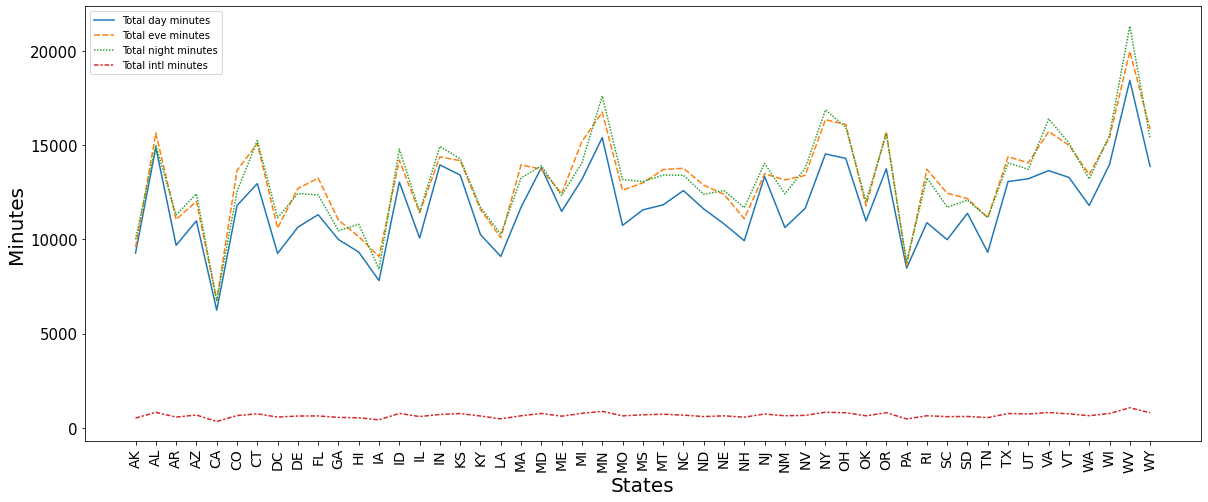

In [75]:
#data grouping
min= df.groupby(['State']).agg({'Total day minutes':"sum",'Total eve minutes':"sum",'Total night minutes':"sum",'Total intl minutes':"sum"})
#figure size
plt.figure(figsize=(20,8))
#plotting graph
b = sns.lineplot(data=min)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
b.set_xlabel('States',fontsize=20)
b.set_ylabel('Minutes',fontsize=20)
#show graph
plt.show()

* In state of West Virginia(WV) have high charges still minutes spent on calls is more and also churn rate is less in West Virginia(WV).

* Very less minute spent in state of California(CA) and Pennsylvania(PA) also have less charges and normal churn rate.
* Company should come up with new strategy and ideas so that call time can be increased in state of California(CA) and Pennsylvania(PA).

##Total minutes spend in each state

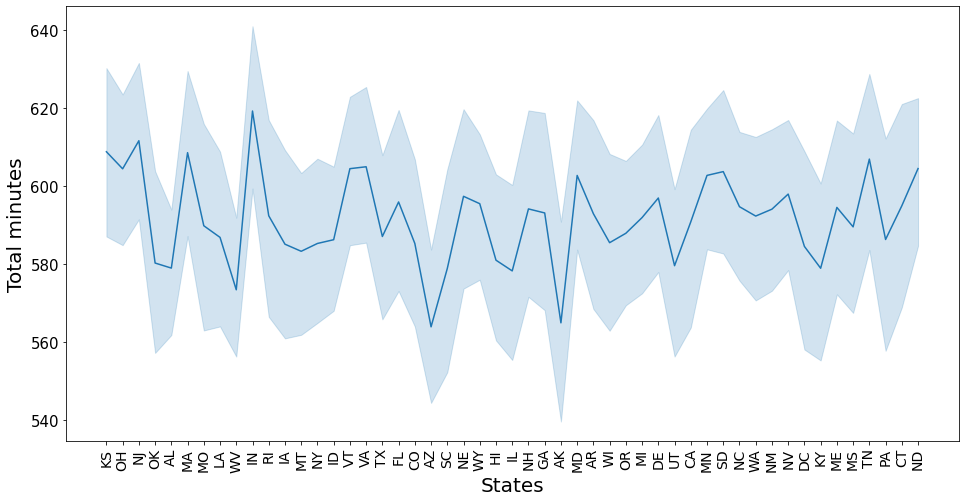

In [76]:
#adding minutes
df['Total minutes']= df['Total day minutes']+ df['Total eve minutes']+df['Total intl minutes']+df['Total night minutes']
#figure size
plt.figure(figsize=(16,8))
#graph plot
min_=sns.lineplot(x= df['State'], y= df['Total minutes'])
#fontsize
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
min_.set_xlabel('States',fontsize=20)
min_.set_ylabel('Total minutes',fontsize=20)
#show graph
plt.show()

* From the graph we can conclude that in West Virginia(WV) people spend more time in calls as compared to Arizona(AZ) and 	Alaska(AK) where services are not so improved. So the company has to improve/increase their services in the above mentioned states.


#**6. In which state calls are maximum and minimum?**

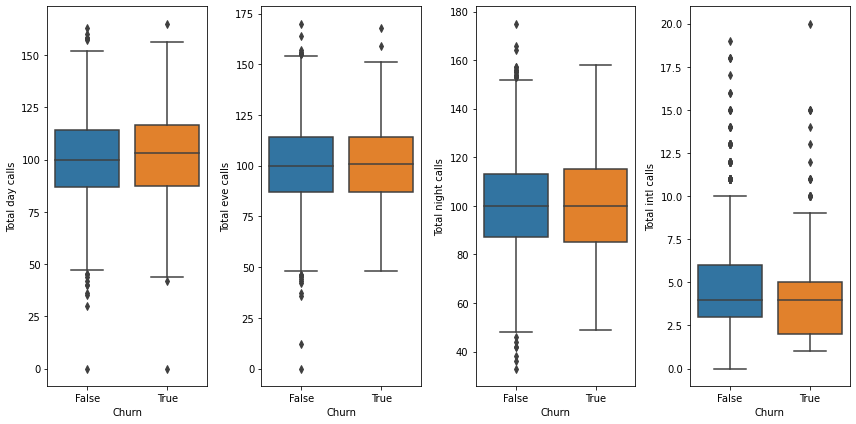

In [77]:
# subplots and figure size
fig, axs = plt.subplots(ncols=4,figsize=(12,6))
#graph plot
sns.boxplot(x='Churn', y='Total day calls', data=df, ax=axs[0])
sns.boxplot(x='Churn', y='Total eve calls', data=df, ax=axs[1])
sns.boxplot(x='Churn', y='Total night calls', data=df, ax=axs[2])
sns.boxplot(x='Churn', y='Total intl calls', data=df, ax=axs[3])

# this prevents plots from overlapping
plt.tight_layout()

* Churn depends on total day calls, total evening calls and total night calls and high for total international calls

##Total calls in each state

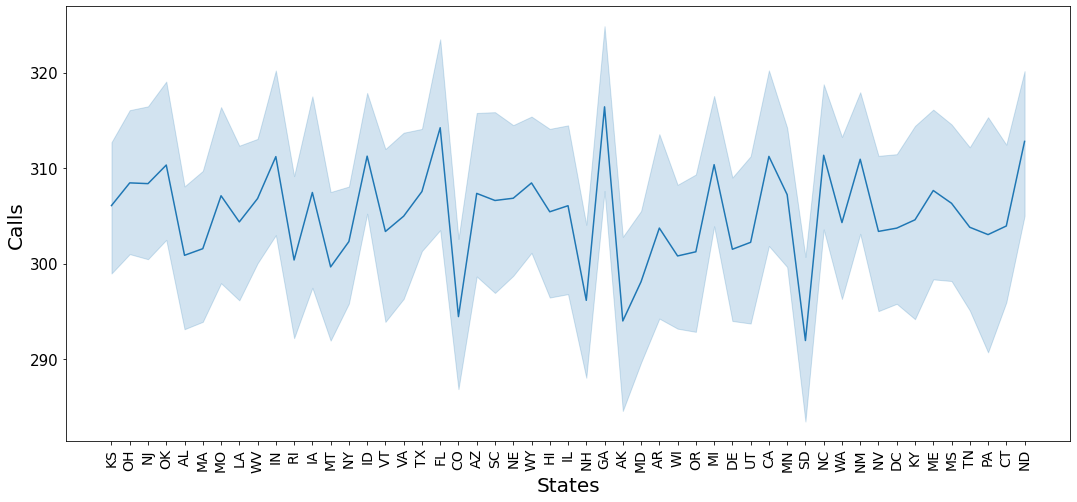

In [78]:
#Grouping the data
df['Total calls']= df['Total day calls']+ df['Total eve calls']+df['Total intl calls']+df['Total night calls']
#figure size
plt.figure(figsize=(18,8))
#graph plot
c=sns.lineplot(x= df['State'], y=df['Total calls'])
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
c.set_xlabel('States',fontsize=20)
c.set_ylabel('Calls',fontsize=20)
#show graph
plt.show()

* From above graph we can conclude that the total calls are maximum in states of Georgia(GA) and Florida(FL) and there churn rate is average (not high).
* Minimum calls are in states of South Dakota(SD),  Alaska(AK), Colorado(CO) also there churn rate is average(not high).
* Company should focus in this states where calls are less.

## Average calls in each State

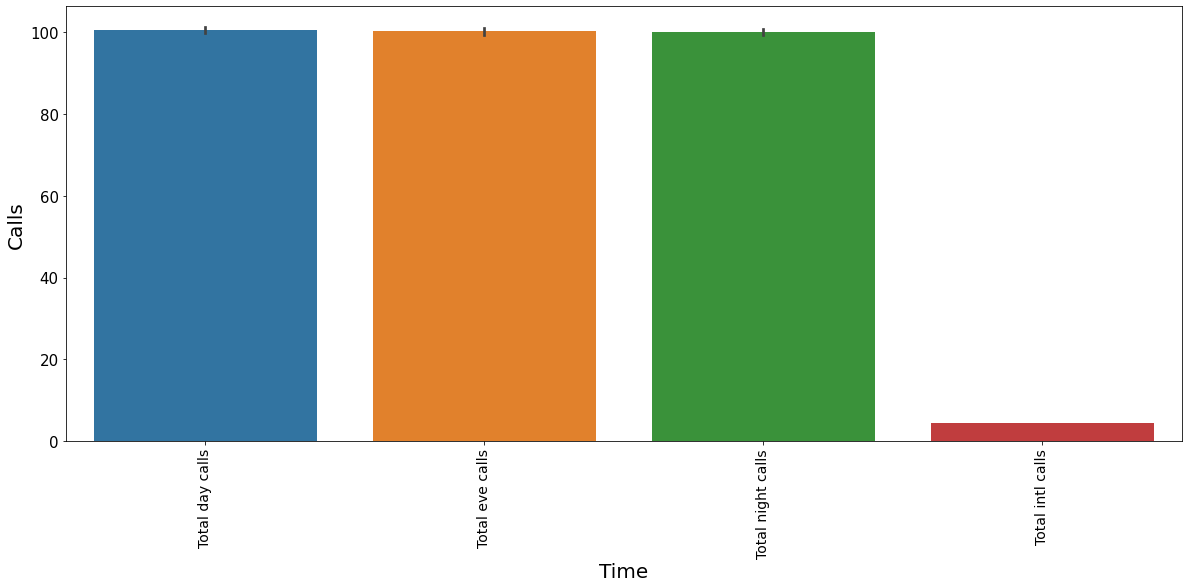

In [79]:
#grouping of data
total_calls =df.groupby(['State']).agg({'Total day calls':"mean",'Total eve calls':"mean",'Total night calls':"mean",'Total intl calls':"mean"})
#figure size
plt.figure(figsize=(20,8))
#graph plot
e = sns.barplot(data=total_calls)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labeling
e.set_xlabel('Time',fontsize=20)
e.set_ylabel('Calls',fontsize=20)
#show graph
plt.show()

* Average calls of day, evening and night are equal except international calls.

#**7. What is the effect of customer service on churn?**

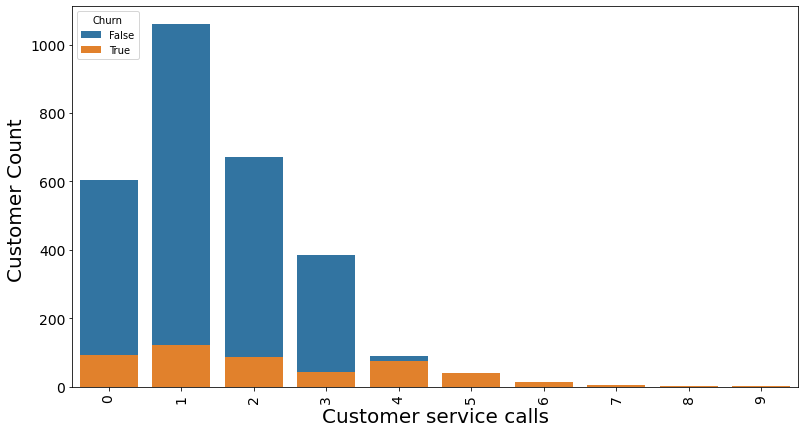

In [80]:
#figure size
plt.figure(figsize=(13,7))
#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
#graph plot
calls_ = sns.countplot(x='Customer service calls',hue='Churn', data=df, dodge= False)
#labelling
calls_.set_xlabel('Customer service calls',fontsize=20)
calls_.set_ylabel('Customer Count ',fontsize=20)
#show graph
plt.show()

* From above graph People calling Customer service for only one time have high churn rate


##Customer service calls in each states

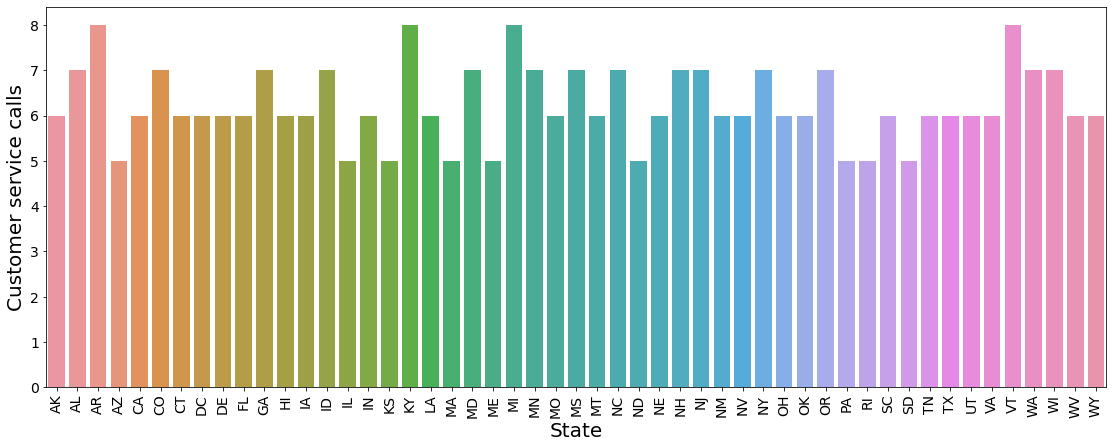

In [81]:
#Plotting customer service vs state to know the relationship
service_calls= df.groupby(['Customer service calls', 'State']).size().unstack()
#figure size
plt.figure(figsize=(19,7))
#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
#Graph plt
calls_ = sns.countplot(data=service_calls)
#Labels
calls_.set_xlabel('State',fontsize=20)
calls_.set_ylabel('Customer service calls',fontsize=20)
#Graph show
plt.show()

* Customer service is required to solve customer's queries, request and complaints. Above bar graph shows that the call rate is high in states of Arkansas(AR), Kentucky(KY), Michigan(MI) and Vermont(VT).
* This shows that the service provide by the Telecom company is not good in these states that's why customers contacted them and also Michigan(MI) have high churn rate.

## Average customer calls

Text(0, 0.5, 'Average customer service calls ')

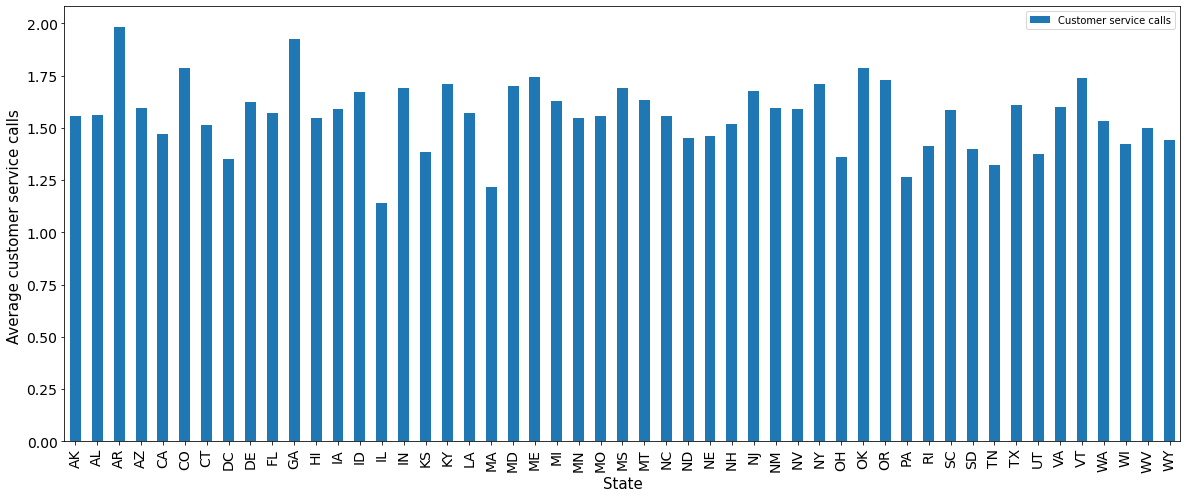

In [82]:
#mean of customer service calls
customer_service = df.groupby(['State']).agg({'Customer service calls':"mean",})
#figure size
plt.rcParams['figure.figsize'] = (20, 8)

#graph plot
ax = customer_service.plot.bar(fontsize = 14)
# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Average customer service calls ", fontsize = 15)

* The states Arkansas(AR), Georgia(GA) have high average customer service calls.
* The customer service in these states should be looked into to prevent churn in the future.

#**8. On which parameters churn rate depends and its correlation?**

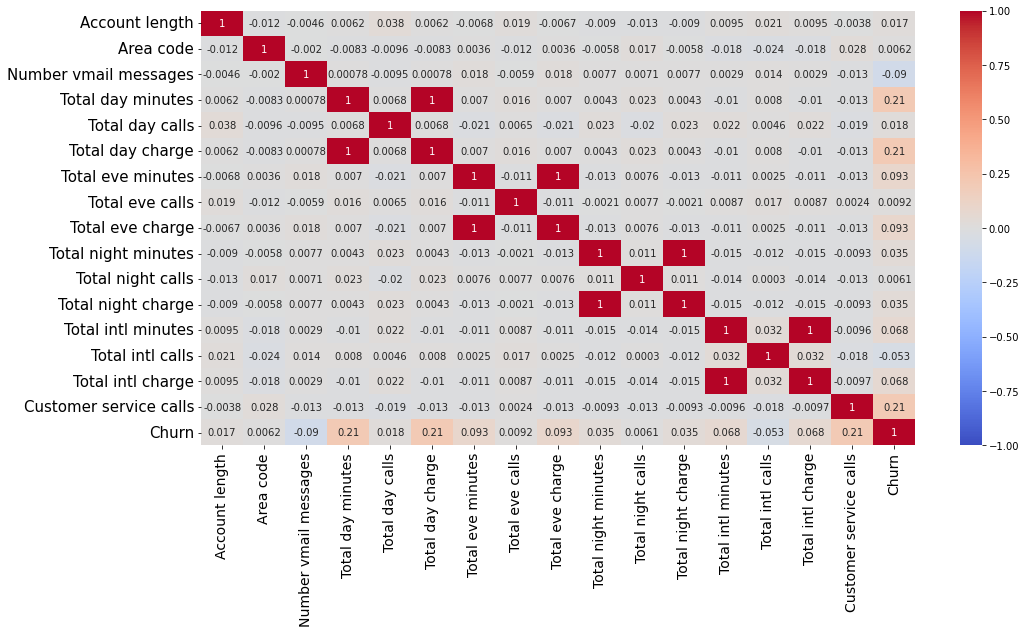

In [83]:

#figure size
plt.figure(figsize=(16,8))
#Font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#Graph plot 
sns.heatmap(df.drop(["Total charges","Total minutes","Total calls"],axis=1).corr(), vmin=-1, cmap='coolwarm', annot=True)

* From the above heatmap, we can see most of the values are near zero correlation(range of 0.00) but total day charge, total day minutes and customer service calls are affecting the churn rate(0.21 correlation) maximum.
* Churn is negatively correlated to Number vmail messages and total International calls.
* Churn is weakly correlated to total day calls, total eve calls, total night calls and total night charge.
* Small Correlation between churn and total day charges and also churn and customer service calls.
* Positve correlation between minutes and charges of day, evening, night and international which is equals to 1 (i.e. maximum). 